In [259]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

In [130]:
train=pd.read_csv("train.csv")
test_df=pd.read_csv("test_x.csv")
data=train.copy()

In [131]:
data.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [132]:
data["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

In [133]:

filterwarnings('ignore')

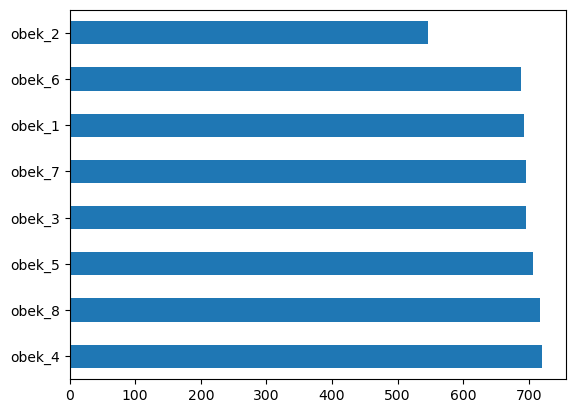

In [134]:
data["Öbek İsmi"].value_counts().plot.barh();

In [135]:
data.describe().round(3)

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
count,5460.000,5460.000,5460.000,5460.000,5460.000
mean,2729.500,363571.133,16616.612,24.041,73.446
std,1576.311,219714.442,14099.172,14.946,47.214
min,0.000,43922.989,2859.254,0.000,3.978
25%,1364.750,215693.439,4931.859,11.551,25.009
50%,2729.500,286925.436,8426.819,20.096,82.486
75%,4094.250,468188.222,30579.245,35.918,104.473
max,5459.000,1192437.145,48605.594,64.616,242.308


In [136]:
data.corr()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,1.000000,0.036008,0.019259,0.012507,-0.001693
Yıllık Ortalama Gelir,0.036008,1.000000,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,0.019259,0.740238,1.000000,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.012507,0.444398,0.418499,1.000000,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,-0.001693,0.145425,0.133864,0.659455,1.000000


In [137]:
data.drop("index",axis=1,inplace=True)

In [138]:
data.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [139]:
df_2 = data[data["Öbek İsmi"] == "obek_2"]      


In [140]:
from sklearn.utils import resample
desired_sample_count = 150

df_2_upsampled = resample(df_2, replace=True, n_samples=desired_sample_count, random_state=12)



In [141]:
df_2_upsampled.shape

(150, 13)

In [142]:
balanced_data = pd.concat([data, df_2_upsampled])

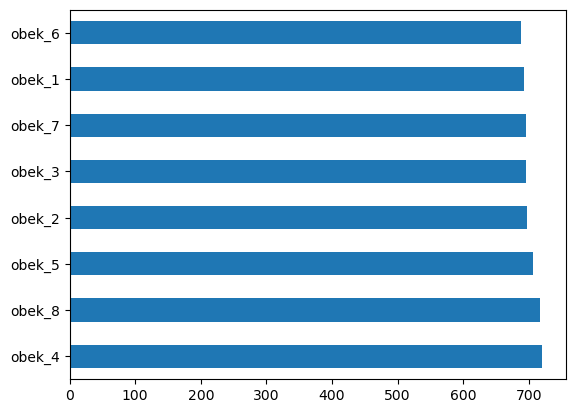

In [143]:
balanced_data["Öbek İsmi"].value_counts().plot.barh();

In [144]:
hopa=data.copy()

In [145]:
data=balanced_data

In [146]:
x=data.drop("Öbek İsmi",axis=1)
y=data["Öbek İsmi"]

In [147]:
#category çecirme

In [148]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(x.columns)
categorical_columns = []

data=x

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")
    
x=data

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


In [149]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Cinsiyet                                    5610 non-null   category
 1   Yaş Grubu                                   5610 non-null   category
 2   Medeni Durum                                5610 non-null   category
 3   Eğitim Düzeyi                               5610 non-null   category
 4   İstihdam Durumu                             5610 non-null   category
 5   Yıllık Ortalama Gelir                       5610 non-null   float64 
 6   Yaşadığı Şehir                              5610 non-null   category
 7   En Çok İlgilendiği Ürün Grubu               5610 non-null   category
 8   Yıllık Ortalama Satın Alım Miktarı          5610 non-null   float64 
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5610 non-null   float64 
 10  

In [150]:
#dumy değişken dönüşümü

In [151]:
import pandas as pd
#girdi--> data

df = x

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

x=df

In [152]:
x.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,748266.440879,32010.900881,37.310644,102.936904,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,246298.609605,4145.729891,11.554851,82.176053,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2,268582.732360,9924.379414,55.353236,141.661426,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,327721.837865,6417.780714,15.417239,17.097397,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,397431.626948,7886.663061,14.689837,20.470459,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [153]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Yıllık Ortalama Gelir                           5610 non-null   float64
 1   Yıllık Ortalama Satın Alım Miktarı              5610 non-null   float64
 2   Yıllık Ortalama Sipariş Verilen Ürün Adedi      5610 non-null   float64
 3   Yıllık Ortalama Sepete Atılan Ürün Adedi        5610 non-null   float64
 4   Cinsiyet_Kadın                                  5610 non-null   uint8  
 5   Yaş Grubu_31-40                                 5610 non-null   uint8  
 6   Yaş Grubu_41-50                                 5610 non-null   uint8  
 7   Yaş Grubu_51-60                                 5610 non-null   uint8  
 8   Yaş Grubu_>60                                   5610 non-null   uint8  
 9   Medeni Durum_Evli                        

In [154]:
dumy_colons = []


for column in x.columns:
    if x[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass


In [155]:
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [156]:
#standardizasyon

In [157]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi

x_train=x


# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons
# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)




# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)

x=x_train_final

x.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,1.778211,1.118361,0.902493,0.643934,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.511290,-0.864086,-0.840020,0.200040,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2,-0.409651,-0.452968,2.123168,1.471915,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,-0.139915,-0.702443,-0.578709,-1.191427,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,0.178035,-0.597940,-0.627922,-1.119307,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [158]:
#test datasını oluşturma

test_df.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


In [159]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(test_df.columns)
categorical_columns = []

data=test_df

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")
    
test_df=data
test_df.head()

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu


,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


In [160]:
import pandas as pd
#girdi--> data

df = test_df

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

test_df=df

In [161]:
test_df.head()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,0,365331.930346,5566.587664,15.442635,19.646460,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,1,414899.236174,6756.766203,14.957246,19.675863,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,2,152825.872271,4493.915682,10.907930,46.904518,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,3,489052.908472,42670.646595,32.333021,48.083609,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,4,323635.711534,5959.266948,4.519968,12.752491,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [162]:
dumy_colons = []


for column in test_df.columns:
    if test_df[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [163]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi

x_train=test_df


# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons
# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)




# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)

test_df=x_train_final

test_df.head()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,-1.731311,0.013800,-0.778776,-0.551195,-1.132406,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,-1.729830,0.235917,-0.695331,-0.584541,-1.131771,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,-1.728350,-0.938465,-0.853982,-0.862732,-0.543702,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,-1.726870,0.568208,1.822635,0.609184,-0.518237,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,-1.725389,-0.173046,-0.751244,-1.301588,-1.281298,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [164]:
test_df.head()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
0,-1.731311,0.013800,-0.778776,-0.551195,-1.132406,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,-1.729830,0.235917,-0.695331,-0.584541,-1.131771,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
2,-1.728350,-0.938465,-0.853982,-0.862732,-0.543702,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
3,-1.726870,0.568208,1.822635,0.609184,-0.518237,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,-1.725389,-0.173046,-0.751244,-1.301588,-1.281298,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [165]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Modeller

### NaiveBayes

In [166]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9090909090909091

### K-Neighbors

In [167]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9331550802139037

In [168]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9376114081996435

In [169]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9402852049910874

In [170]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9411764705882353

In [171]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9385026737967914

### Linear Discriminant Analysis

In [172]:
discriminant = LinearDiscriminantAnalysis(solver="svd")
discriminant.fit(X_train,Y_train)
Y_pred = discriminant.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9447415329768271

In [173]:
discriminant = LinearDiscriminantAnalysis(solver="lsqr")
discriminant.fit(X_train,Y_train)
Y_pred = discriminant.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9447415329768271

In [174]:
discriminant = LinearDiscriminantAnalysis(solver="eigen")
discriminant.fit(X_train,Y_train)
Y_pred = discriminant.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9447415329768271

### SVC (Support Vector Classifier)

In [175]:
svc = SVC(kernel="linear")
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9554367201426025

In [176]:
svc = SVC(kernel="poly")
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9536541889483066

In [177]:
svc = SVC(kernel="rbf")
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9554367201426025

In [178]:
svc = SVC(kernel="sigmoid")
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9376114081996435

### Decision Tree Classifier

In [179]:
dtc = DecisionTreeClassifier(criterion="gini",splitter="best")
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9073083778966132

In [180]:
dtc = DecisionTreeClassifier(criterion="gini",splitter="random")
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8859180035650623

In [181]:
dtc = DecisionTreeClassifier(criterion="entropy",splitter="best")
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9064171122994652

In [182]:
dtc = DecisionTreeClassifier(criterion="entropy",splitter="random")
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8957219251336899

In [183]:
dtc = DecisionTreeClassifier(criterion="log_loss",splitter="best")
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9073083778966132

In [184]:
dtc = DecisionTreeClassifier(criterion="log_loss",splitter="random")
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.893048128342246

### Random Forest Classifier

In [193]:
rfc = RandomForestClassifier(n_estimators = 50,criterion="gini")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [194]:
rfc = RandomForestClassifier(n_estimators = 50,criterion="entropy")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [195]:
rfc = RandomForestClassifier(n_estimators = 50,criterion="log_loss")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [192]:
rfc = RandomForestClassifier(n_estimators = 100,criterion="gini")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [196]:
rfc = RandomForestClassifier(n_estimators = 100,criterion="entropy")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [197]:
rfc = RandomForestClassifier(n_estimators = 100,criterion="log_loss")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [191]:
rfc = RandomForestClassifier(n_estimators = 150,criterion="gini")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [198]:
rfc = RandomForestClassifier(n_estimators = 150,criterion="entropy")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [199]:
rfc = RandomForestClassifier(n_estimators = 150,criterion="log_loss")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [200]:
rfc = RandomForestClassifier(n_estimators = 200,criterion="gini")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [201]:
rfc = RandomForestClassifier(n_estimators = 200,criterion="entropy")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

In [204]:
rfc = RandomForestClassifier(n_estimators = 200,criterion="log_loss")
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9581105169340464

### Gradient Boosting Classifier

In [206]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=50,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9527629233511586

In [207]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=50,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9545454545454546

In [208]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=50,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9545454545454546

In [209]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=50,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9527629233511586

In [212]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=100,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9527629233511586

In [213]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=100,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9536541889483066

In [214]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=100,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9518716577540107

In [215]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=100,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9518716577540107

In [216]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=150,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9474153297682709

In [217]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=150,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9474153297682709

In [218]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=150,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9474153297682709

In [219]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=150,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9474153297682709

In [220]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=200,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.948306595365419

In [221]:
gbc = GradientBoostingClassifier(loss="log_loss",n_estimators=200,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.948306595365419

In [222]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=200,criterion="friedman_mse")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.948306595365419

In [223]:
gbc = GradientBoostingClassifier(loss="deviance",n_estimators=200,criterion="squared_error")
gbc.fit(X_train,Y_train)
Y_pred = gbc.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9491978609625669

### LightGBM Classifier (LGBMClassifier)

In [232]:
lgbmc = LGBMClassifier(boosting_type="gbdt",n_estimators=50)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320


0.9572192513368984

In [233]:
lgbmc = LGBMClassifier(boosting_type="gbdt",n_estimators=100)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320


0.9572192513368984

In [234]:
lgbmc = LGBMClassifier(boosting_type="gbdt",n_estimators=150)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

0.9563279857397504

In [237]:
lgbmc = LGBMClassifier(boosting_type="gbdt",n_estimators=200)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

0.9563279857397504

In [238]:
lgbmc = LGBMClassifier(boosting_type="dart",n_estimators=50)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320


0.9581105169340464

In [239]:
lgbmc = LGBMClassifier(boosting_type="dart",n_estimators=100)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320


0.9581105169340464

In [247]:
lgbmc = LGBMClassifier(boosting_type="dart",n_estimators=150)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320


0.9581105169340464

In [244]:
lgbmc = LGBMClassifier(boosting_type="dart",n_estimators=200)
lgbmc.fit(X_train,Y_train)
Y_pred = lgbmc.predict(X_test)
accuracy_score(Y_test,Y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 4488, number of used features: 29
[LightGBM] [Info] Start training from score -2.112053
[LightGBM] [Info] Start training from score -2.113896
[LightGBM] [Info] Start training from score -2.070568
[LightGBM] [Info] Start training from score -2.060023
[LightGBM] [Info] Start training from score -2.054792
[LightGBM] [Info] Start training from score -2.099244
[LightGBM] [Info] Start training from score -2.075883
[LightGBM] [Info] Start training from score -2.051320


0.9581105169340464

### CatBoost

In [271]:
catboost = CatBoostClassifier(iterations=1000,learning_rate=0.1)
catboost.fit(X_train,Y_train)
Y_pred = catboost.predict(X_test)
accuracy_score(Y_test,Y_pred)

0:	learn: 1.5419628	total: 11.3ms	remaining: 11.3s
1:	learn: 1.2736003	total: 24.1ms	remaining: 12s
2:	learn: 1.0992441	total: 39.6ms	remaining: 13.2s
3:	learn: 0.9584273	total: 53ms	remaining: 13.2s
4:	learn: 0.8487433	total: 68.4ms	remaining: 13.6s
5:	learn: 0.7630022	total: 80ms	remaining: 13.3s
6:	learn: 0.6911341	total: 93.5ms	remaining: 13.3s
7:	learn: 0.6325158	total: 108ms	remaining: 13.3s
8:	learn: 0.5855562	total: 118ms	remaining: 13s
9:	learn: 0.5427765	total: 128ms	remaining: 12.7s
10:	learn: 0.5060107	total: 138ms	remaining: 12.4s
11:	learn: 0.4763524	total: 147ms	remaining: 12.1s
12:	learn: 0.4492331	total: 157ms	remaining: 12s
13:	learn: 0.4277951	total: 168ms	remaining: 11.9s
14:	learn: 0.4084143	total: 179ms	remaining: 11.8s
15:	learn: 0.3908433	total: 191ms	remaining: 11.8s
16:	learn: 0.3766121	total: 198ms	remaining: 11.5s
17:	learn: 0.3627080	total: 209ms	remaining: 11.4s
18:	learn: 0.3505206	total: 222ms	remaining: 11.5s
19:	learn: 0.3399917	total: 237ms	remaining:

0.9563279857397504